# MNIST

In [1]:
# Importing required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import matplotlib.cm as cm 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading train and test sets

train_set=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mnist_train.csv",header=None)
test_set=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mnist_test.csv",header=None)

###Data Visualizing

In [4]:
print("Train set shape:",train_set.shape)
print("Test set shape:",test_set.shape)

Train set shape: (60000, 785)
Test set shape: (10000, 785)


In [8]:
# Splitting data to pixel and label

x_train= np.array(train_set.iloc[:,1:])
y_train= np.array(train_set.iloc[:,0])

x_test= np.array(test_set.iloc[:,1:])
y_test= np.array(test_set.iloc[:,0])

In [7]:
print("Pixel size",x_train.shape)
print("Label size",y_train.reshape(-1,1).shape)

Pixel size (60000, 784)
Label size (60000, 1)


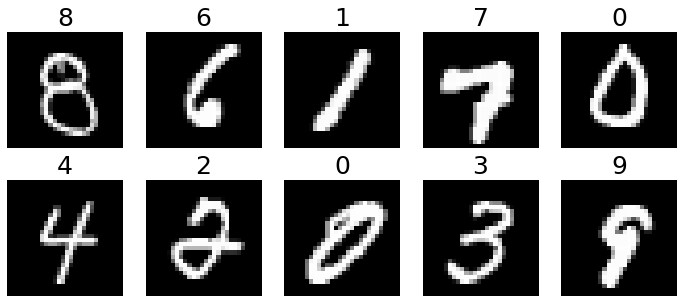

In [10]:
# Visualizing the randomly chosen 10 input 

fig, axes = plt.subplots(2,5, figsize=(12,5))
axes = axes.flatten()
index = np.random.randint(0,60000,size=10)
for i in range(10):
    axes[i].imshow(x_train[index[i],:].reshape(28,28), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(str(int(y_train[index[i]])),color= 'black',  fontsize=25)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


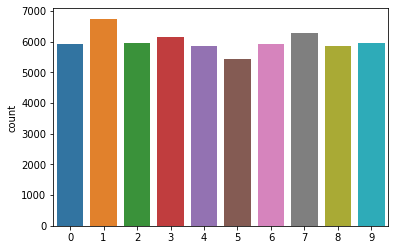

In [11]:
# Visualizing the number of labels from 0 to 9

import seaborn as sns
sns.countplot(y_train)
plt.show()

### Data Pre-Processing

In [12]:
print("Original label size:\n\n",y_train.reshape(-1,1).shape)
print("\n\n Original label samples:\n\n",y_train[:5],"\n\n")

Original label size:

 (60000, 1)


 Original label samples:

 [5 0 4 1 9] 




In [13]:
# Converting target labels to one-hot encoding format

encoded_label_train= np.full((60000,10),0.01)
for i in range(10):
    val= y_test[i]
    for k in range(60000):
        if val==k:
            encoded_label_train[i,val]=0.99
y_train=encoded_label_train

In [14]:
print("Encoded label size:\n\n",y_train.shape)
print("\n\n Encoded label samples:\n\n",y_train[:5,:])

Encoded label size:

 (60000, 10)


 Encoded label samples:

 [[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01]
 [0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01]]


In [15]:
# Normalizing pixel values (0-255) to shift them up to range 0.01-1.00

x_train=x_train/(255.0 * 0.99) + 0.01

x_test=x_test/(255.0 * 0.99) + 0.01

### Neural Network

In [16]:
class NeuralNetwork:

    #Initializing neural network with parameters
    def __init__(self,input_nodes,hidden1_nodes,hidden2_nodes,output_nodes,lr):
        self.input_nodes = input_nodes
        self.hidden1_nodes= hidden1_nodes
        self.hidden2_nodes= hidden2_nodes
        self.output_nodes= output_nodes
        self.lr = lr

        self.init_weights()

    #Initializing weights 
    def init_weights(self):

        self.W1 = np.random.normal(0.0,pow(self.input_nodes,-0.5),(self.hidden1_nodes,self.input_nodes))
        self.W2 = np.random.normal(0.0,pow(self.hidden1_nodes,-0.5),(self.hidden2_nodes,self.hidden1_nodes))
        self.W3 = np.random.normal(0.0,pow(self.hidden2_nodes,-0.5),(self.output_nodes,self.hidden2_nodes))


    # Activation function
    def sigmoid(self,x):
       return 1 / (1 + np.exp(-x))

    # Derivative of activation function
    def derivative_sigmoid(self,x):
       return x*(1-x)

    # Training neural network with forward and backward propagation
    def train(self,input_list,target_list):
       inputs = np.array(input_list, ndmin=2).T
       targets = np.array(target_list, ndmin=2).T

       # FORWARD PROPAGATION

       out1= np.dot(self.W1,inputs) 
       act1 = self.sigmoid(out1)

       out2 = np.dot(self.W2,act1) 
       act2 = self.sigmoid(out2)
            
       out3 = np.dot(self.W3,act2) 
       act3 = self.sigmoid(out3)

       

      #BACKWARD PROPAGATION

       output_error= targets-act3
       hidden2_error= np.dot(self.W3.T,output_error)
       hidden1_error= np.dot(self.W2.T,hidden2_error)

       max_error=np.max(targets)-np.max(act3)

       self.dw3= np.dot((output_error*self.derivative_sigmoid(act3)),act2.T)
       self.dw2= np.dot((hidden2_error*self.derivative_sigmoid(act2)),act1.T)
       self.dw1= np.dot((hidden1_error*self.derivative_sigmoid(act1)),inputs.T)

       self.W3+= self.lr* self.dw3
       self.W2+= self.lr* self.dw2
       self.W1+= self.lr* self.dw1

       return max_error

    #Prediction function
    def predict(self,input_list):

       inputs = np.array(input_list, ndmin=2).T

       hidden1= np.dot(self.W1,inputs) 
       activated1 = self.sigmoid(hidden1)

       hidden2 = np.dot(self.W2,activated1) 
       activated2 = self.sigmoid(hidden2)
              
       output = np.dot(self.W3,activated2) 
       activated_output = self.sigmoid(output)

       return activated_output

In [17]:
# Defining required parameters for training neural network

input_nodes=784
hidden1_nodes=128
hidden2_nodes=64
output_nodes=10

#### Preparing input data

In [18]:
training_data_file=open("/content/drive/MyDrive/Colab Notebooks/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [19]:
test_data_file=open("/content/drive/MyDrive/Colab Notebooks/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

####Learning rate and epoch number optimization

In [22]:
learning_rate_scores=[]
for learning_rate in [0.001,0.005,0.01,0.2,0.4]: 
    print(f"\n\n >>>Learning rate: {learning_rate}")
    MyNN = NeuralNetwork(input_nodes,hidden1_nodes,hidden2_nodes,output_nodes,learning_rate)

    for epoch in range(20): 
        # TRAINING
        for row in training_data_list:
          values = row.split(',')

          inputs = np.asfarray(values[1:])
          inputs=inputs/(255.0 * 0.99) + 0.01

          targets = np.zeros(output_nodes) + 0.01
          targets[int(values[0])] = 0.99

          MyNN.train(inputs, targets)

        # PREDICTION AND EVALUATION
        
        score = 0
        for record in test_data_list:
          values = record.split(',')
        

          inputs = np.asfarray(values[1:]) 
          inputs= inputs/(255.0 * 0.99) + 0.01
          
          outputs = MyNN.predict(inputs)

          label = np.argmax(outputs)
          correct_label = int(values[0])

          if (label == correct_label):
            score +=1

        accuracy= (score/10000)*100
        learning_rate_scores.append(accuracy)
        print (f"Epoch {epoch+1} accuracy= % {accuracy:.2f}")



 >>>Learning rate: 0.001
Epoch 1 accuracy= % 64.51
Epoch 2 accuracy= % 79.99
Epoch 3 accuracy= % 87.41
Epoch 4 accuracy= % 89.90
Epoch 5 accuracy= % 90.99
Epoch 6 accuracy= % 91.65
Epoch 7 accuracy= % 92.25
Epoch 8 accuracy= % 92.67
Epoch 9 accuracy= % 93.03
Epoch 10 accuracy= % 93.44
Epoch 11 accuracy= % 93.81
Epoch 12 accuracy= % 94.08
Epoch 13 accuracy= % 94.36
Epoch 14 accuracy= % 94.57
Epoch 15 accuracy= % 94.74
Epoch 16 accuracy= % 94.94
Epoch 17 accuracy= % 95.08
Epoch 18 accuracy= % 95.26
Epoch 19 accuracy= % 95.41
Epoch 20 accuracy= % 95.55


 >>>Learning rate: 0.005
Epoch 1 accuracy= % 90.46
Epoch 2 accuracy= % 93.21
Epoch 3 accuracy= % 94.64
Epoch 4 accuracy= % 95.32
Epoch 5 accuracy= % 95.98
Epoch 6 accuracy= % 96.35
Epoch 7 accuracy= % 96.63
Epoch 8 accuracy= % 96.85
Epoch 9 accuracy= % 97.00
Epoch 10 accuracy= % 97.07
Epoch 11 accuracy= % 97.13
Epoch 12 accuracy= % 97.22
Epoch 13 accuracy= % 97.25
Epoch 14 accuracy= % 97.37
Epoch 15 accuracy= % 97.38
Epoch 16 accuracy= 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


Epoch 1 accuracy= % 87.54
Epoch 2 accuracy= % 85.25
Epoch 3 accuracy= % 87.79
Epoch 4 accuracy= % 84.62
Epoch 5 accuracy= % 84.96
Epoch 6 accuracy= % 84.82
Epoch 7 accuracy= % 86.99
Epoch 8 accuracy= % 87.04
Epoch 9 accuracy= % 86.63
Epoch 10 accuracy= % 87.64
Epoch 11 accuracy= % 86.56
Epoch 12 accuracy= % 88.26
Epoch 13 accuracy= % 85.12
Epoch 14 accuracy= % 87.69
Epoch 15 accuracy= % 86.46
Epoch 16 accuracy= % 86.88
Epoch 17 accuracy= % 87.50
Epoch 18 accuracy= % 85.28
Epoch 19 accuracy= % 86.65
Epoch 20 accuracy= % 88.27


 >>>Learning rate: 0.4
Epoch 1 accuracy= % 75.91
Epoch 2 accuracy= % 76.48
Epoch 3 accuracy= % 71.91
Epoch 4 accuracy= % 67.25
Epoch 5 accuracy= % 71.14
Epoch 6 accuracy= % 76.10
Epoch 7 accuracy= % 73.73
Epoch 8 accuracy= % 65.34
Epoch 9 accuracy= % 78.35
Epoch 10 accuracy= % 81.35
Epoch 11 accuracy= % 73.05
Epoch 12 accuracy= % 73.13
Epoch 13 accuracy= % 81.02
Epoch 14 accuracy= % 73.33
Epoch 15 accuracy= % 72.03
Epoch 16 accuracy= % 76.22
Epoch 17 accuracy= % 

####Implementing model with tuned parameters

In [23]:
learning_rate=0.01
epochs=11

MyNN = NeuralNetwork(input_nodes,hidden1_nodes,hidden2_nodes,output_nodes,learning_rate)

train_loss_list=[]
test_loss_list=[]
accuracy_list=[]
for epoch in range(epochs):   
        # TRAINING

        sum_error_train=0
        for row in training_data_list:
          values = row.split(',')

          inputs = np.asfarray(values[1:])
          inputs=inputs/(255.0 * 0.99) + 0.01

          target_train = np.zeros(output_nodes) + 0.01
          target_train[int(values[0])] = 0.99

          max_error_train=MyNN.train(inputs, target_train)
          sum_error_train+=max_error_train
        train_loss=sum_error_train/60000

        # PREDICTION AND EVALUATION

        score = 0
        sum_error_test=0
        output_list=[]
        for record in test_data_list:
          values = record.split(',')
        
          inputs = np.asfarray(values[1:]) 
          inputs= inputs/(255.0 * 0.99) + 0.01
          outputs= MyNN.predict(inputs)
          

          target_test = np.zeros(output_nodes) + 0.01
          target_test[int(values[0])] = 0.99

          max_error_test=np.max(target_test)-np.max(outputs)
          sum_error_test+=max_error_test

          label = np.argmax(outputs)
          correct_label = np.argmax(target_test)
          output_list.append(label)

          if (label == correct_label):
            score +=1

        accuracy= (score/10000)*100
        test_loss=sum_error_test/10000


        accuracy_list.append(accuracy)
        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)
        
  
        print (f"Epoch {epoch+1}: \n train loss= {train_loss:.5f}\n test loss= {test_loss:.5f}\n\n")
          
print(f"Accuracy= % {accuracy}\n\n")


Epoch 1: 
 train loss= 0.30588
 test loss= 0.13795


Epoch 2: 
 train loss= 0.10800
 test loss= 0.09188


Epoch 3: 
 train loss= 0.07850
 test loss= 0.07125


Epoch 4: 
 train loss= 0.06321
 test loss= 0.06162


Epoch 5: 
 train loss= 0.05355
 test loss= 0.05546


Epoch 6: 
 train loss= 0.04740
 test loss= 0.05020


Epoch 7: 
 train loss= 0.04195
 test loss= 0.04571


Epoch 8: 
 train loss= 0.03806
 test loss= 0.04382


Epoch 9: 
 train loss= 0.03486
 test loss= 0.04225


Epoch 10: 
 train loss= 0.03214
 test loss= 0.04069


Epoch 11: 
 train loss= 0.03008
 test loss= 0.03882


Accuracy= % 97.34




### Model Evaluation

#### Train loss, test loss, accuracy graphs

Text(0.5, 0, 'Epoch number')

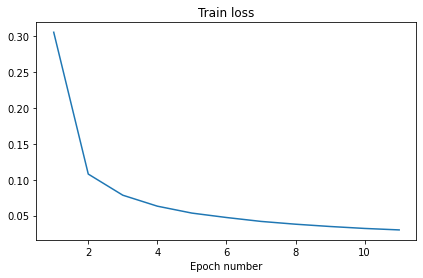

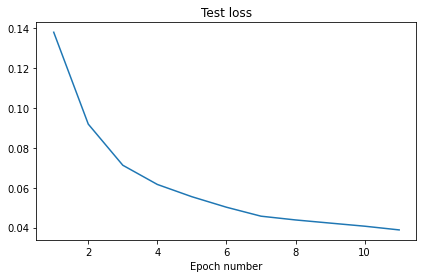

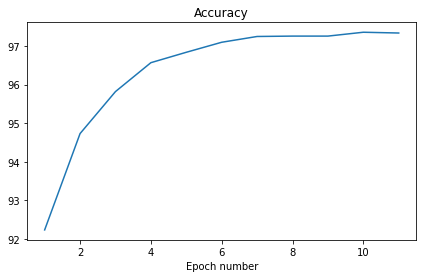

In [25]:
plt.figure(1, figsize=(6.81, 4))
plt.plot(np.arange(1,12,1),train_loss_list)
plt.title('Train loss')
plt.xlabel('Epoch number')

plt.figure(2,figsize=(6.81, 4))
plt.plot(np.arange(1,12,1),test_loss_list)
plt.title('Test loss')
plt.xlabel('Epoch number')

plt.figure(3,figsize=(6.98, 4))
plt.plot(np.arange(1,12,1),accuracy_list)
plt.title('Accuracy')
plt.xlabel('Epoch number')


####Confusion matrix

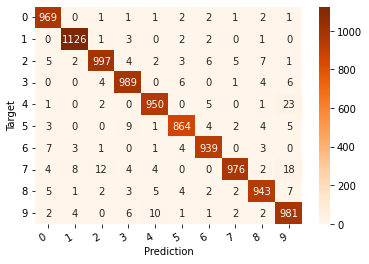

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Oranges")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('Target')
  plt.xlabel('Prediction');

class_names = [0,1,2,3,4,5,6,7,8,9]
cm = confusion_matrix(y_test, output_list)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

#### Precision, recall and f1-score

In [27]:
print(classification_report(y_test, output_list))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.99      0.95      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.94      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

